In [1]:
import scanpy as sc
import pandas as pd
import anndata
from pathlib import Path
import math

sc.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
sc.settings.presenter_view = True  # set max width size for presenter view

In [27]:
#adata

In [2]:
import sys
import importlib
sys.path.append('/corgi/cellbuster/py')
import henlab_common

In [3]:
####################################################
# Concatenate a list of adatas into one big adata
def concatenate_adatas(list_adata):
    return anndata.AnnData.concatenate(*list_adata,batch_key='batch')


In [4]:
list_adata=henlab_common.read_cr(Path("/corgi/cellbuster/bigb"), samplemeta=None)
adata = concatenate_adatas(list_adata)

reading /corgi/cellbuster/bigb/cellranger-arc/lib1/outs/filtered_feature_bc_matrix.h5


Found donor information
lib1


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:01)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /corgi/cellbuster/bigb/cellranger-arc/lib2/outs/filtered_feature_bc_matrix.h5


Found trust4 data: /corgi/cellbuster/bigb/trust4/lib1/TRUST_gex_possorted_bam_barcode_report.tsv
lib2


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /corgi/cellbuster/bigb/cellranger-arc/lib3/outs/filtered_feature_bc_matrix.h5


Found trust4 data: /corgi/cellbuster/bigb/trust4/lib2/TRUST_gex_possorted_bam_barcode_report.tsv
lib3


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:01)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /corgi/cellbuster/bigb/cellranger-arc/lib4/outs/filtered_feature_bc_matrix.h5


Found trust4 data: /corgi/cellbuster/bigb/trust4/lib3/TRUST_gex_possorted_bam_barcode_report.tsv
lib4


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:01)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Found trust4 data: /corgi/cellbuster/bigb/trust4/lib4/TRUST_gex_possorted_bam_barcode_report.tsv


In [5]:
adata

AnnData object with n_obs × n_vars = 11770 × 36601
    obs: 'batchname', 'cellbc', 'donor', 'prob_doublet', 'trust4_celltype', 'batch'
    var: 'gene_ids', 'feature_types', 'genome'

In [6]:
adata.to_df()


MIR1302-2HG  FAM138A  OR4F5  AL627309.1  AL627309.3  \
AAACAGCCATTGTGGC-1-0          0.0      0.0    0.0         0.0         0.0   
AAACATGCAATGAAGC-1-0          0.0      0.0    0.0         0.0         0.0   
AAACATGCATTAAACC-1-0          0.0      0.0    0.0         0.0         0.0   
AAACATGCATTAGGTT-1-0          0.0      0.0    0.0         0.0         0.0   
AAACCAACATTGCGGT-1-0          0.0      0.0    0.0         0.0         0.0   
...                           ...      ...    ...         ...         ...   
TTTGTGGCACCAACCG-1-3          0.0      0.0    0.0         0.0         0.0   
TTTGTGTTCATGGTTA-1-3          0.0      0.0    0.0         0.0         0.0   
TTTGTGTTCCTCACTA-1-3          0.0      0.0    0.0         0.0         0.0   
TTTGTGTTCGCTAGAT-1-3          0.0      0.0    0.0         0.0         0.0   
TTTGTTGGTTGGATAT-1-3          0.0      0.0    0.0         0.0         0.0   

                      AL627309.2  AL627309.5  AL627309.4  AP006222.2  \
AAACAGCCATTGTGGC-1-0         0.0         0.0         0.0         0.0   
AAACATGCAATGAAGC-1-0         0.0         0.0         0.0         0.0   
AAACATGCATTAAACC-1-0         0.0         0.0         0.0         0.0   
AAACATGCATTAGGTT-1-0         0.0         0.0         0.0         0.0   
AAACCAACATTGCGGT-1-0         0.0         0.0         0.0         0.0   
...                          ...         ...         ...         ...   
TTTGTGGCACCAACCG-1-3         0.0         0.0         0.0         0.0   
TTTGTGTTCATGGTTA-1-3         0.0         0.0         0.0         0.0   
TTTGTGTTCCTCACTA-1-3         0.0         0.0         0.0         0.0   
TTTGTGTTCGCTAGAT-1-3         0.0         0.0         0.0         0.0   
TTTGTTGGTTGGATAT-1-3         0.0         0.0         0.0         0.0   

                      AL732372.1  ...  AC133551.1  AC136612.1  AC136616.1  \
AAACAGCCATTGTGGC-1-0         0.0  ...         0.0         0.0         0.0   
AAACATGCAATGAAGC-1-0         0.0  ...         0.0         0.0         0.0   
AAACATGCATTAAACC-1-0         0.0  ...         0.0         0.0         0.0   
AAACATGCATTAGGTT-1-0         0.0  ...         0.0         0.0         0.0   
AAACCAACATTGCGGT-1-0         0.0  ...         0.0         0.0         0.0   
...                          ...  ...         ...         ...         ...   
TTTGTGGCACCAACCG-1-3         0.0  ...         0.0         0.0         0.0   
TTTGTGTTCATGGTTA-1-3         0.0  ...         0.0         0.0         0.0   
TTTGTGTTCCTCACTA-1-3         0.0  ...         0.0         0.0         0.0   
TTTGTGTTCGCTAGAT-1-3         0.0  ...         0.0         0.0         0.0   
TTTGTTGGTTGGATAT-1-3         0.0  ...         0.0         0.0         0.0   

                      AC136616.3  AC136616.2  AC141272.1  AC023491.2  \
AAACAGCCATTGTGGC-1-0         0.0         0.0         0.0         0.0   
AAACATGCAATGAAGC-1-0         0.0         0.0         0.0         0.0   
AAACATGCATTAAACC-1-0         0.0         0.0         0.0         0.0   
AAACATGCATTAGGTT-1-0         0.0         0.0         0.0         0.0   
AAACCAACATTGCGGT-1-0         0.0         0.0         0.0         0.0   
...                          ...         ...         ...         ...   
TTTGTGGCACCAACCG-1-3         0.0         0.0         0.0         0.0   
TTTGTGTTCATGGTTA-1-3         0.0         0.0         0.0         0.0   
TTTGTGTTCCTCACTA-1-3         0.0         0.0         0.0         0.0   
TTTGTGTTCGCTAGAT-1-3         0.0         0.0         0.0         0.0   
TTTGTTGGTTGGATAT-1-3         0.0         0.0         0.0         0.0   

                      AC007325.1  AC007325.4  AC007325.2  
AAACAGCCATTGTGGC-1-0         0.0         0.0         0.0  
AAACATGCAATGAAGC-1-0         0.0         0.0         0.0  
AAACATGCATTAAACC-1-0         0.0         0.0         0.0  
AAACATGCATTAGGTT-1-0         0.0         0.0         0.0  
AAACCAACATTGCGGT-1-0         0.0         0.0         0.0  
...                          ...         ...         ...  
TTTGTGGCACCAACCG-1-3         

In [30]:
############ add telomers   TODO               move to henlab common
import math
import numpy as np
cellname = [y+"#"+x[0:18] for (x,y) in zip(adata.obs["cellbc"],adata.obs["batchname"])]
df = pd.read_csv("/corgi/cellbuster/bigb/summary_kmer.csv")
df.set_axis(['cellbc', 'count','total'], axis=1, inplace=True)
d = dict(zip(df["cellbc"],df["count"]))
adata.obs["cnt_telo"] = [d[cn] if cn in d else math.nan for cn in cellname]

d = dict(zip(df["cellbc"],df["total"]))
adata.obs["cnt_atac"] = [d[cn] if cn in d else math.nan for cn in cellname]

adata = adata[~np.isnan(adata.obs["cnt_telo"]),:]

In [31]:
sc.pp.filter_cells(adata, min_genes=20)  #lower than usual
sc.pp.filter_genes(adata, min_cells=3)

Trying to set attribute `.obs` of view, copying.
filtered out 10703 genes that are detected in less than 3 cells


In [32]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

... storing 'batchname' as categorical
... storing 'cellbc' as categorical
... storing 'donor' as categorical
... storing 'trust4_celltype' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical


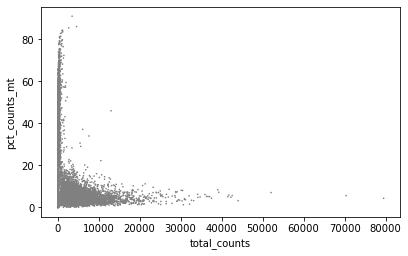

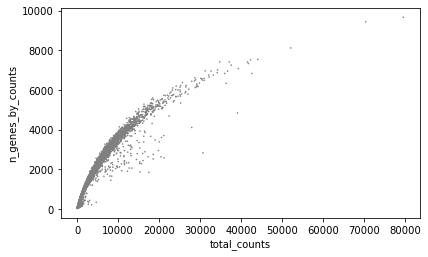

In [9]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [33]:
adata = adata[adata.obs.pct_counts_mt < 25, :]    # a good number!
adata = adata[adata.obs.n_genes_by_counts < 8000, :]
adata

View of AnnData object with n_obs × n_vars = 10168 × 25898
    obs: 'batchname', 'cellbc', 'donor', 'prob_doublet', 'trust4_celltype', 'batch', 'cnt_telo', 'cnt_atac', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [34]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


extracting highly variable genes
... storing 'batchname' as categorical
... storing 'cellbc' as categorical
... storing 'donor' as categorical
... storing 'trust4_celltype' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


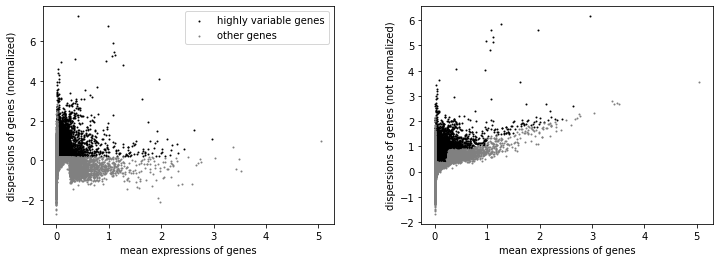

In [35]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.2, batch_key="batchname")
sc.pl.highly_variable_genes(adata)

In [36]:
adata = henlab_common.annotate_cellcycle_human(adata)

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    471 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    515 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


In [37]:
#Keep raw data; reduce matrix
adata.raw = adata
adata = adata[:, adata.var.highly_variable]

In [14]:
# adata.obs["tech"]

In [39]:
#Take care of batch effects (somewhat)
#sc.pp.regress_out(adata, ["tech"]) 
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt']) # this is super slow 2 min and 48 sec
sc.pp.scale(adata, max_value=10)

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
Trying to set attribute `.obs` of view, copying.
... storing 'phase' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cellcycle' as categorical
    finished (0:02:17)


In [40]:
adata  #help(sc.pp.regress_out) 

AnnData object with n_obs × n_vars = 10168 × 7378
    obs: 'batchname', 'cellbc', 'donor', 'prob_doublet', 'trust4_celltype', 'batch', 'cnt_telo', 'cnt_atac', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase', 'cellcycle'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'log1p', 'hvg'

In [41]:
sc.tl.pca(adata, svd_solver='arpack')
if True:
    import bbknn
    bbknn.bbknn(adata, batch_key='batchname')
else:
    sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:06)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


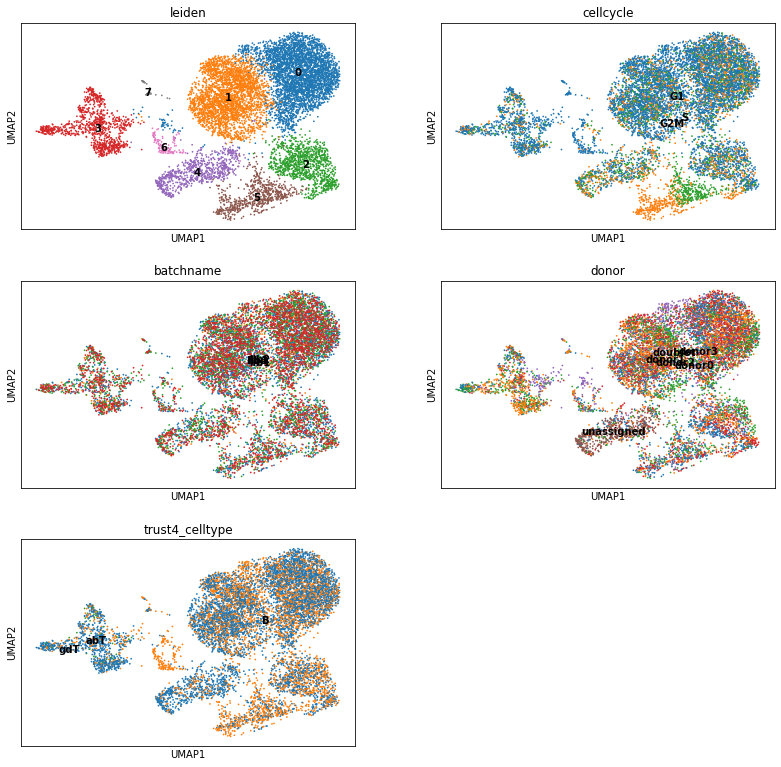

In [42]:
# regresses out dataset:
#sc.tl.leiden(adata, resolution=0.2)  #to get the big groups
sc.tl.leiden(adata, resolution=0.2, key_added=)
sc.pl.umap(adata,color=["leiden","cellcycle","batchname",
                        "donor","trust4_celltype"],ncols=2,legend_loc="on data")

running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
... storing 'phase' as categorical
... storing 'cellcycle' as categorical


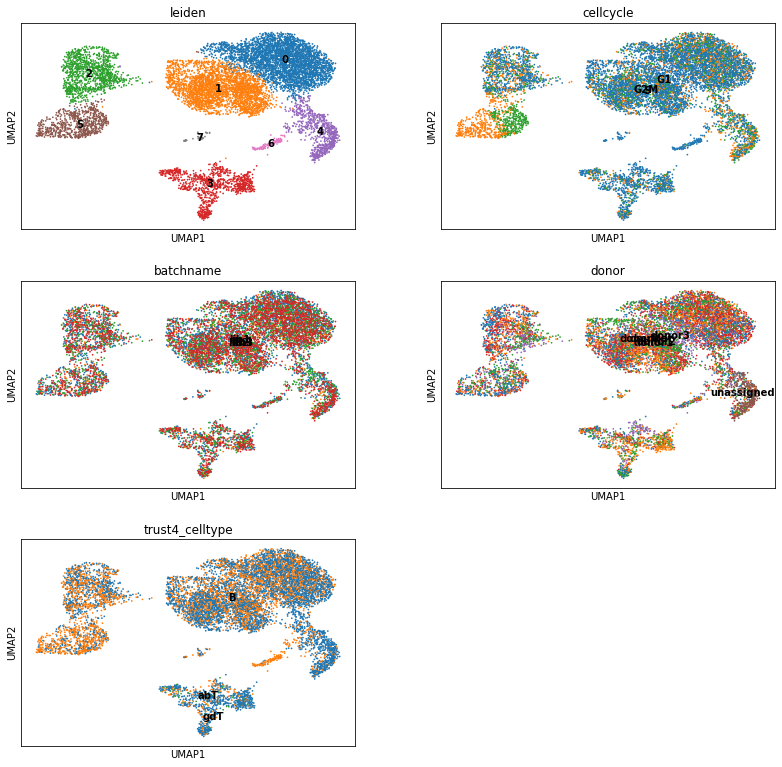

In [16]:
#sc.tl.leiden(adata, resolution=0.2)  #to get the big groups
sc.tl.leiden(adata, resolution=0.2)
sc.pl.umap(adata,color=["leiden","cellcycle","batchname",
                        "donor","trust4_celltype"],ncols=2,legend_loc="on data")

In [46]:
#sc.pl.umap(adata,color=["donor","trust4_celltype"],ncols=1)

In [17]:
adata.obs["log_telo"] = np.log(1+adata.obs["cnt_telo"])
#adata.obs["log_telo_norm"] = np.log(1+adata.obs["cnt_telo"]/adata.obs["total_counts"]*1e12)
adata.obs["log_telo_norm"] = np.log(1+adata.obs["cnt_telo"]/adata.obs["cnt_atac"]*1e3)
#adata.obs["telo_stat"] = np.log(1+adata.obs["cnt_telo"]/adata.obs["total_counts"]*1e15)
adata.obs["log_total_counts"] = np.log(adata.obs["total_counts"])

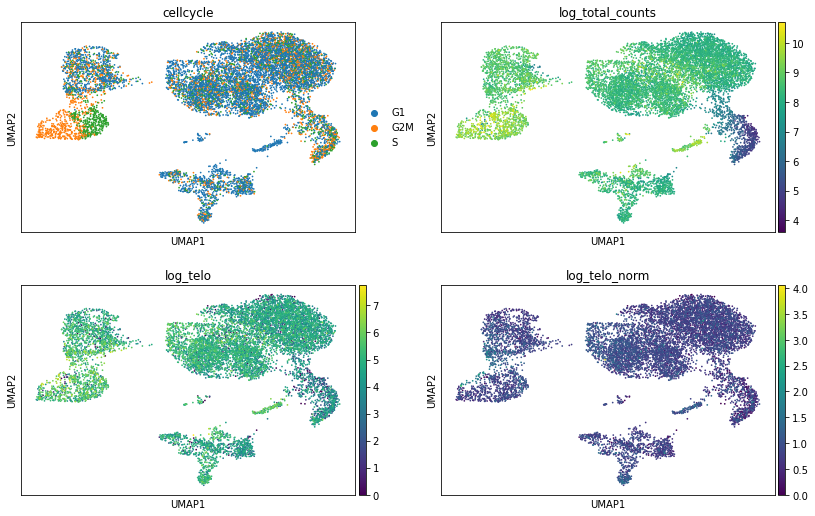

In [82]:
sc.pl.umap(adata,color=["cellcycle","log_total_counts","log_telo",
                "log_telo_norm"],ncols=2)

In [18]:
adata

AnnData object with n_obs × n_vars = 10168 × 7378
    obs: 'batchname', 'cellbc', 'donor', 'prob_doublet', 'trust4_celltype', 'batch', 'cnt_telo', 'cnt_atac', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase', 'cellcycle', 'leiden', 'log_telo', 'log_telo_norm', 'log_total_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'cellcycle_colors', 'batchname_colors', 'donor_colors', 'trust4_celltype_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


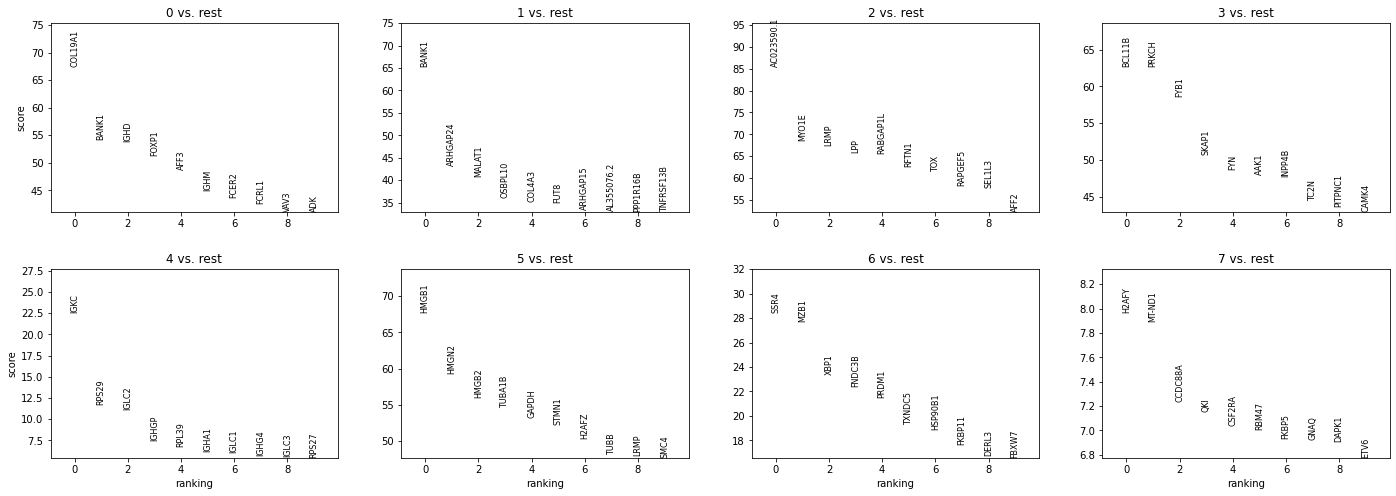

0           1           2        3      4       5        6        7
0  COL19A1       BANK1  AC023590.1   BCL11B   IGKC   HMGB1     SSR4    H2AFY
1    BANK1    ARHGAP24       MYO1E    PRKCH  RPS29   HMGN2     MZB1   MT-ND1
2     IGHD      MALAT1        LRMP     FYB1  IGLC2   HMGB2     XBP1  CCDC88A
3    FOXP1     OSBPL10         LPP    SKAP1  IGHGP  TUBA1B   FNDC3B      QKI
4     AFF3      COL4A3    RABGAP1L      FYN  RPL39   GAPDH    PRDM1   CSF2RA
5     IGHM        FUT8       RFTN1     AAK1  IGHA1   STMN1   TXNDC5    RBM47
6    FCER2    ARHGAP15         TOX   INPP4B  IGLC1   H2AFZ  HSP90B1    FKBP5
7    FCRL1  AL355076.2     RAPGEF5     TC2N  IGHG4    TUBB   FKBP11     GNAQ
8     VAV3    PPP1R16B      SEL1L3  PITPNC1  IGLC3    LRMP    DERL3    DAPK1
9      ADK   TNFRSF13B        AFF2    CAMK4  RPS27    SMC4    FBXW7     ETV6

In [84]:
sc.tl.rank_genes_groups(adata, groupby= "leiden")
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)

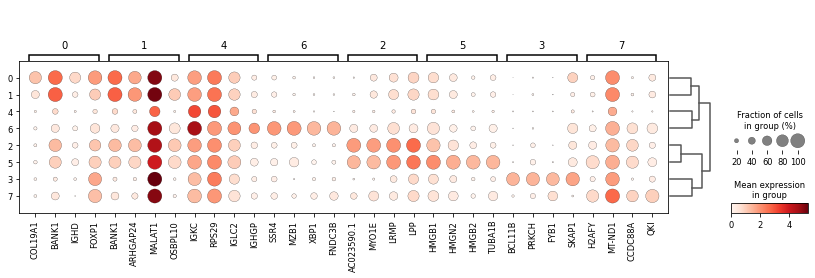

In [88]:
sc.pl.rank_genes_groups_dotplot(adata, groupby= "leiden", n_genes=4)

group 0 marker genes: COL19A1, BANK1, IGHD, FOXP1, 0 and 1 are very similar too, 
group 1 marker genes: BANK1
group 2 marker genes:  CD38, similar to group 5, also cell cycle, possibly part of dark zone group 2 could be before or after t cell activation (group 5 is T cell activation). 2 and 5 are maybe naive B cells, AID is mostly expressed in group 5 and 2 and requires active transcription, 

group 3 marker genes:  BCL11B, PRKCH, FYB1, FYN
group 4 marker genes:
group 5 marker genes:
group 6 marker genes:  SSR4, MZB1, XBP1, FNDC38 ----> most likely plasma cells
group 7 marker genes:


In [114]:
#sc.pl.rank_genes_groups(adata, n_genes=4, sharey=False)
#adata
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)

0           1           2        3      4       5        6        7
0  COL19A1       BANK1  AC023590.1   BCL11B   IGKC   HMGB1     SSR4    H2AFY
1    BANK1    ARHGAP24       MYO1E    PRKCH  RPS29   HMGN2     MZB1   MT-ND1
2     IGHD      MALAT1        LRMP     FYB1  IGLC2   HMGB2     XBP1  CCDC88A
3    FOXP1     OSBPL10         LPP    SKAP1  IGHGP  TUBA1B   FNDC3B      QKI
4     AFF3      COL4A3    RABGAP1L      FYN  RPL39   GAPDH    PRDM1   CSF2RA
5     IGHM        FUT8       RFTN1     AAK1  IGHA1   STMN1   TXNDC5    RBM47
6    FCER2    ARHGAP15         TOX   INPP4B  IGLC1   H2AFZ  HSP90B1    FKBP5
7    FCRL1  AL355076.2     RAPGEF5     TC2N  IGHG4    TUBB   FKBP11     GNAQ
8     VAV3    PPP1R16B      SEL1L3  PITPNC1  IGLC3    LRMP    DERL3    DAPK1
9      ADK   TNFRSF13B        AFF2    CAMK4  RPS27    SMC4    FBXW7     ETV6

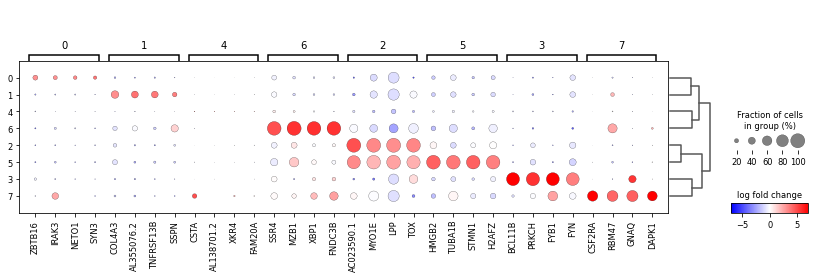

In [89]:
sc.pl.rank_genes_groups_dotplot(adata, groupby= "leiden", 
                                n_genes=4, values_to_plot='logfoldchanges',
                                min_logfoldchange=3, vmax=7, vmin=-7, cmap='bwr')



categories: 0, 1, 2, etc.
var_group_labels: 2, 5


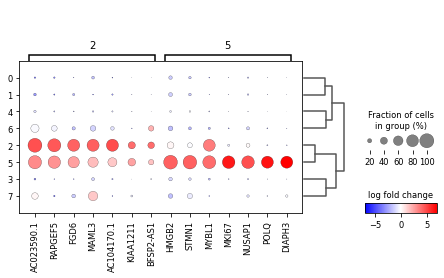

In [127]:
sc.pl.rank_genes_groups_dotplot(badatasave, groupby= "leiden", n_genes=7, values_to_plot='logfoldchanges', min_logfoldchange=4, vmax=7, vmin=-7, cmap='bwr', groups=['2', '5'])

# HMGB2 STMN1 MYBL1 POLQ

categories: 0, 1, 2, etc.
var_group_labels: 0, 1


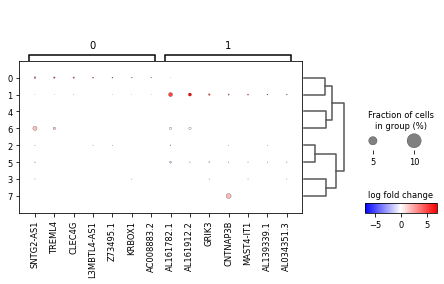

In [24]:
sc.pl.rank_genes_groups_dotplot(badatasave, 
                                groupby= "leiden", 
                                n_genes=7, values_to_plot='logfoldchanges',
                                min_logfoldchange=4, vmax=7, vmin=-7, cmap='bwr', groups=['0', '1'])





In [67]:
badatasave

AnnData object with n_obs × n_vars = 10168 × 7378 backed at 'bestbcellanalysis.h5ad'
    obs: 'batchname', 'cellbc', 'donor', 'prob_doublet', 'trust4_celltype', 'batch', 'cnt_telo', 'cnt_atac', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase', 'cellcycle', 'leiden', 'log_telo', 'log_telo_norm', 'log_total_counts', 'b_cell_type'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'batchname_colors', 'cellcycle_colors', 'dendrogram_leiden', 'donor_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'trust4_celltype_colors', 'umap', 'b_cell_type_colors', 'dendrogram_b_cell_type'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances

categories: 0, 1, 2, etc.
var_group_labels: 7


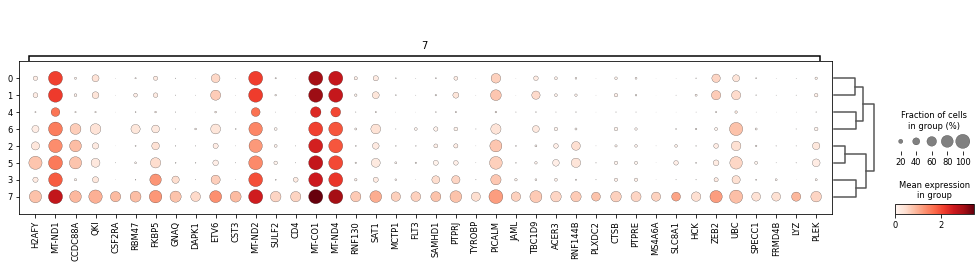

In [110]:
sc.pl.rank_genes_groups_dotplot(badatasave, groupby= "leiden", n_genes=40, groups=['7'])



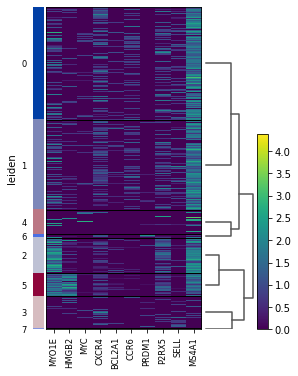

In [140]:
sc.pl.heatmap(badatasave, ["MYO1E", "HMGB2", "MYC", "CXCR4", "BCL2A1", "CCR6", "PRDM1", "P2RX5", "SELL", "MS4A1"], groupby="leiden", cmap='viridis', dendrogram=True)

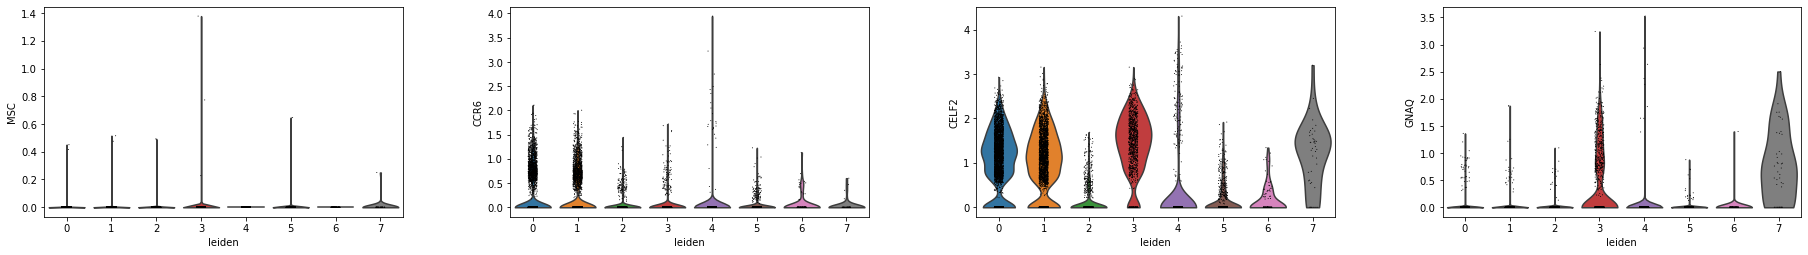

In [35]:
#sc.pl.violin(badatasave, ["AICDA"], groupby='leiden')
#sc.pl.violin(badatasave, ["FOXP1"], groupby='leiden')
sc.pl.violin(badatasave, ["MSC", "CCR6", "CELF2", "GNAQ"], groupby='leiden')
# S1P1
# no CCR6 expression in 7, CCR6 is for precursor memory B cells, so maybe 7 is MBC since 
#it shows other markers of MBC

In [50]:
# https://scanpy.readthedocs.io/en/stable/generated/scanpy.get.obs_df.html

#badatasave.obs
# adata.obs
#adata.var

#adata['ENSG00000112486']

# how to get mean expression of genes in clusters

marker_genes = ['S1PR1', 'CD38']
genedf = sc.get.obs_df(
        adata,
        keys=["leiden", *marker_genes]
    )
grouped = genedf.groupby("leiden")
mean, var = grouped.mean(), grouped.var()
 
mean

S1PR1      CD38
leiden                    
0       0.143379 -0.244245
1      -0.034650 -0.393959
2      -0.151796  1.266054
3       0.010604 -0.146715
4      -0.141327 -0.251605
5      -0.175860  1.117966
6      -0.206502  1.033617
7      -0.149259 -0.302225

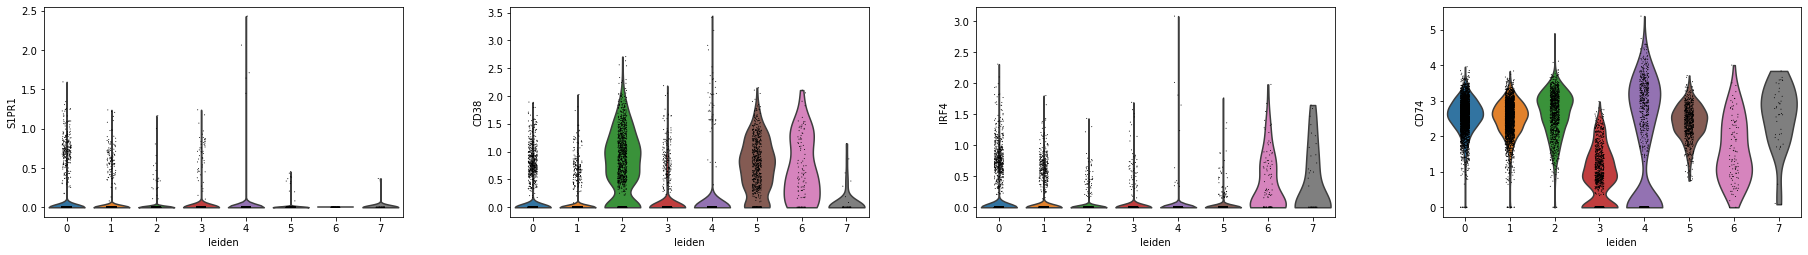

In [34]:
sc.pl.violin(badatasave, ["S1PR1", "CD38", "IRF4", "CD74"], groupby='leiden')




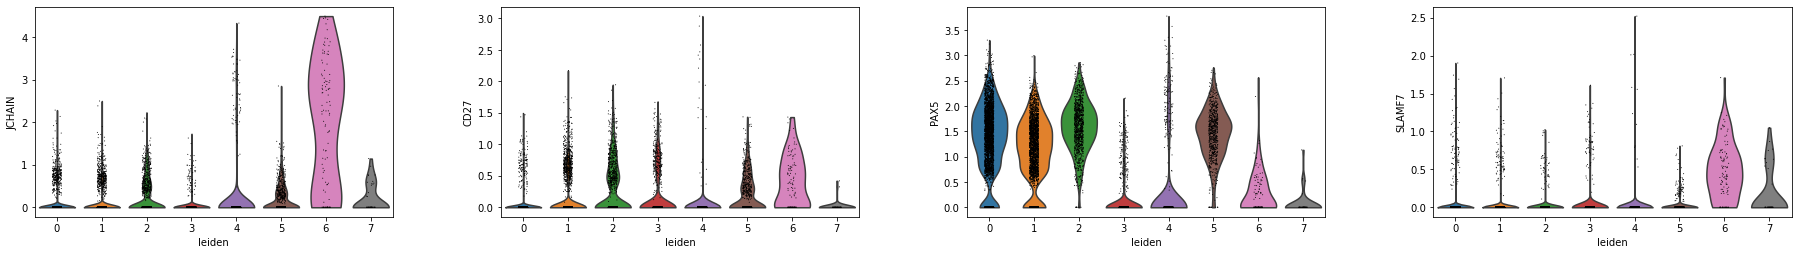

In [56]:
# investigating plasma cells: 
# all plasma cell markers (except PAX5), and are very strong markers! 

#badatasave
sc.pl.violin(badatasave, ["JCHAIN", "CD27", 
                         
                         "PAX5", # a marker for differentiation into plasma cells when downregulated
                          "SLAMF7" # apparently a very stable biomarker of plasma cells
                         ], groupby='leiden')
# Jchain is marker for plasma cells
# source: https://en.wikipedia.org/wiki/Plasma_cell


In [2]:
# investigating plasmablasts: 

#sc.pl.violin(badatasave, ['IRF4', 'CD19', 'PRDM1', 'CD80'], groupby='leiden')


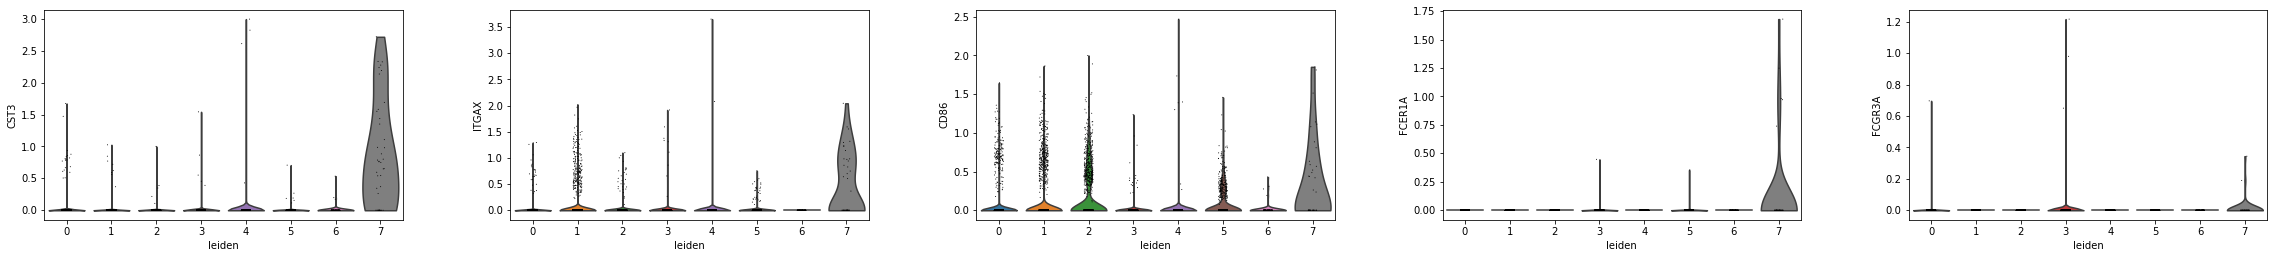

In [116]:
# checking if the memory b cells group7 could be dendritic cells cells: 

sc.pl.violin(badatasave, ['CST3', 'ITGAX', 'CD86', 'FCER1A', 'FCGR3A'], groupby='leiden')



categories: 0, 1, 2, etc.
var_group_labels: 4


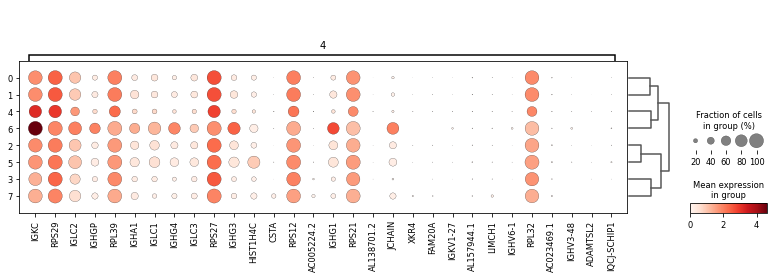

In [72]:
# checking if the memory b cells group7 could be dendritic cells part 2: 

sc.pl.rank_genes_groups_dotplot(badatasave, groupby= "leiden", n_genes=30, groups=['4'])




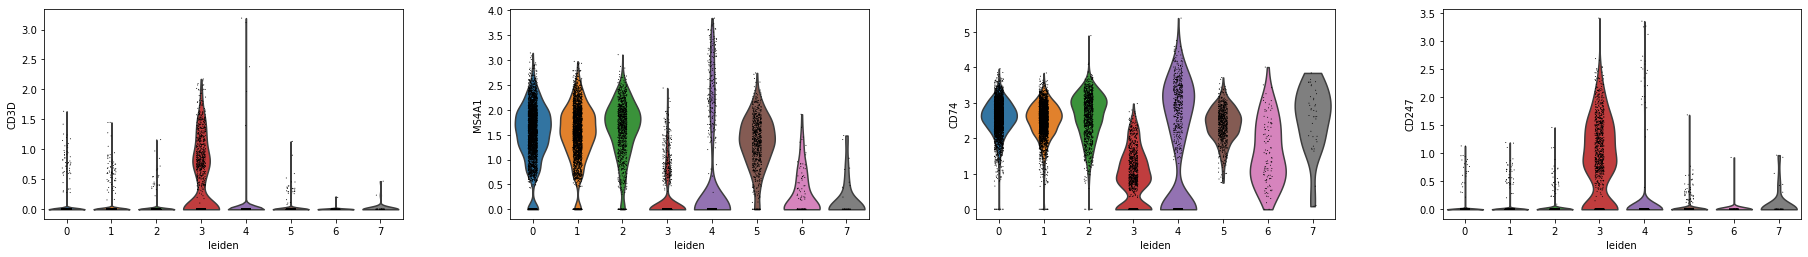

In [101]:
# checking if the naive b cells group3 could be t cells: 

# CD3D is apparently expressed on t cells mostly but not often expressed on b cells until activated???
sc.pl.violin(badatasave, ['CD3D', 'MS4A1', 'CD74', 'CD247'], groupby='leiden')

# seems group 3 is in fact t cells,  many components of TCR (such as CD3 and CD247) are only 
# expressed by t cells
# FOXP1 is expressed by all white blood cells including t cells -> so group 3 is likely t cells!
# foxp evidence: https://pubmed.ncbi.nlm.nih.gov/27861791/

In [4]:
# Analysis for DZ and LZ:

#sc.pl.violin(badatasave, ['CD83', 'CXCR4', 'AICDA'], groupby = 'leiden')
# markers for LZ and DZ:
# CD83 is low in DZ, high in LZ
# CXCR4 is high in DZ, low in LZ
# AICDA ia marker gene for DZ! so these groups seem to make sense
# is AICDA a more reliable marker than CXCR4?




In [5]:
#Naive b cell analysis: 
# negative for: 'CD22', 'CD5', 'CD53', 'CR2', 'FCER2', 'MME', 'TCL1A' , 'CD24' CD52
#sc.pl.violin(badatasave, ['FOXP1', 'PTPRC', 'SELL', 'BACH2', 'CD40'], ncols=2, groupby='leiden')
# PTPRC is maybe a good marker for naive b cells?
# seems these are naive cells...but hard to tell since some markers are negative
# FOXP1 is inhibitor of plasma cell differentiation and is known to be highly expressed in 
# naive b cells, source from:  
# https://ashpublications.org/blood/article/126/18/2076/34484/FOXP1-inhibits-plasma-cell-differentiation

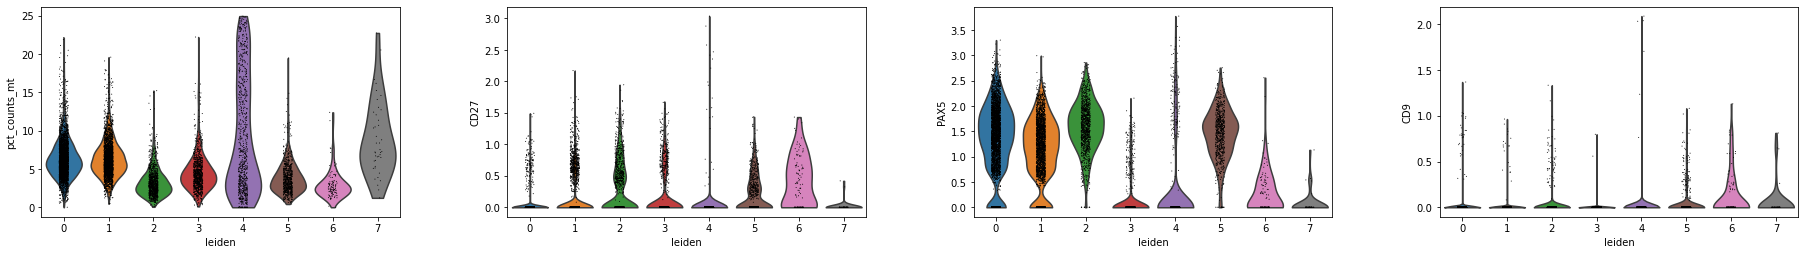

In [27]:
#badatasave.var.mean_counts
#badatasave.obs.pct_counts_mt
# possible that group 7 and 3 are naive b cells
# highest percent mitochondrial genes in group 0 and 1, possibly intermediate or light zone?
# mitochondrial count can be a marker of apoptosis too, https://pubmed.ncbi.nlm.nih.gov/30049712/
sc.pl.violin(badatasave, ['pct_counts_mt', 'CD27', 'PAX5', 'CD9'], groupby = 'leiden') 

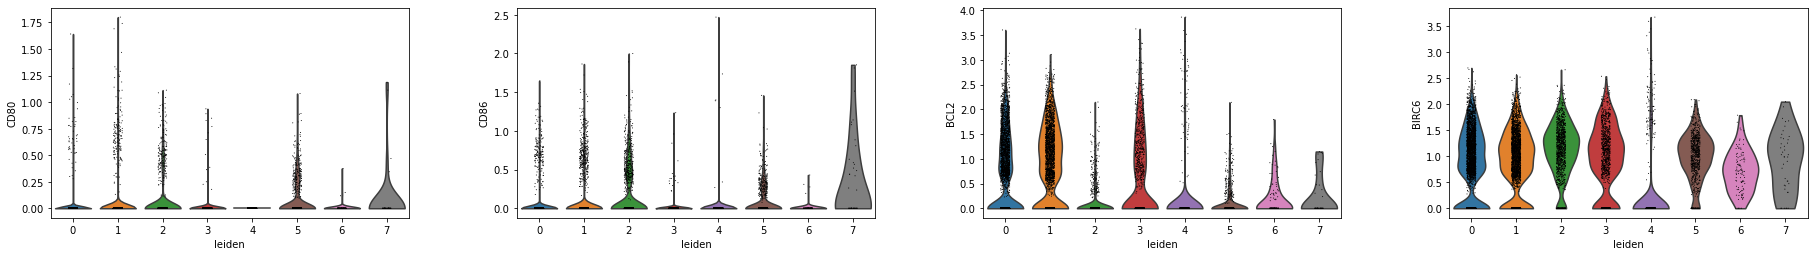

In [42]:
# MBC analysis: 

# CD80 is higher in MBC and memory b cells
# source https://www.sciencedirect.com/science/article/pii/S0952791517300316?via=ihub#fig0005
# apparently MBC are similar to naive B cells? so perhaps the resolution is too low to see precursors as these
# would not be very different from each other. so 7 is MBC?
sc.pl.violin(badatasave, ['CD80', 'CD86', 'BCL2', 'BIRC6'], groupby = 'leiden') 

# 3 is naive cells! 

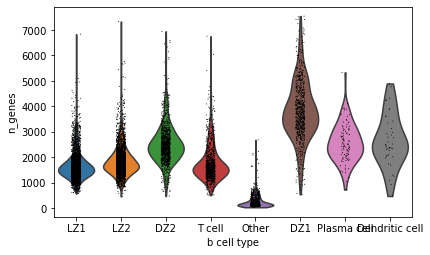

In [59]:
# creating figures for presentation: 

sc.pl.violin(badatasave, ['n_genes'], groupby='b_cell_type')
 

In [65]:
# creating figures for presentation:
# dotplot
# marker gene groups: 
#
marker_genes_dict = {
    'Dendritic cell': ['ITGAX', 'CST3'], # complete
    'LZ': ['CD83'], # complete, maybe add another later
    'DZ': ['AICDA'], # also complete, excluded: 'CXCR4'
    # completely exluded 'Other': ['CD74'],  what to put here? possibly CD74?
    'Plasma cell': ['JCHAIN'], # complete, , excluded: , 'CD27',)'SLAMF7' could potentially be included, is stable
    'T cell': ['CD3D', 'CD247'], # complete
}

# Analysis for DZ and LZ:

#sc.pl.violin(badatasave, ['CD83', 'CXCR4', 'AICDA'], groupby = 'leiden')
# markers for LZ and DZ:
# CD83 is low in DZ, high in LZ
# CXCR4 is high in DZ, low in LZ
# AICDA ia marker gene for DZ! so these groups seem to make sense
# is AICDA a more reliable marker than CXCR4?
# perhaps 2 is in intermediate phase?

# investigating plasma cells: 
# all plasma cell markers (except PAX5), and are very strong markers! 

#badatasave

# Jchain is marker for plasma cells
# source: https://en.wikipedia.org/wiki/Plasma_cell

# a marker for differentiation into plasma cells when downregulated
                          

    
    

In [6]:
#sc.pl.dotplot(badatasave, marker_genes_dict, 'b_cell_type', dendrogram=True)


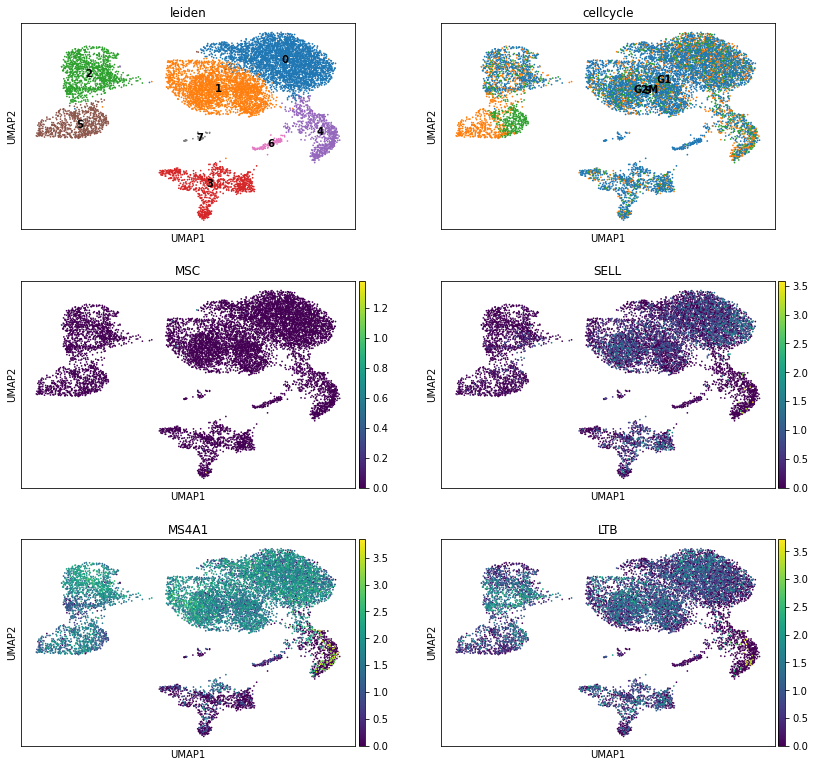

In [30]:
sc.pl.umap(badatasave,
           color=["leiden", 
                  "cellcycle", "MSC", "SELL", "MS4A1", "LTB" 
                 
                 ], ncols=2, legend_loc="on data")

In [62]:
#badatasave.uns['trust4_celltype_colors']
#badatasave[:5, ['n_cells', 'A']]
#adata_subset.obs['foo']
#badatasave.obs['trust4_celltype']

# how to get the frequency of each cell type:

# importing the module
import collections

# initializing the list
random_list = badatasave.obs['trust4_celltype']

# using Counter to find frequency of elements
frequency = collections.Counter(random_list)

# printing the frequency
print(dict(frequency))


{'B': 4244, '': 5869, 'abT': 54, 'gdT': 1}


In [63]:
badatasave

AnnData object with n_obs × n_vars = 10168 × 7378 backed at 'bestbcellanalysis.h5ad'
    obs: 'batchname', 'cellbc', 'donor', 'prob_doublet', 'trust4_celltype', 'batch', 'cnt_telo', 'cnt_atac', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase', 'cellcycle', 'leiden', 'log_telo', 'log_telo_norm', 'log_total_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'batchname_colors', 'cellcycle_colors', 'dendrogram_leiden', 'donor_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'trust4_celltype_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

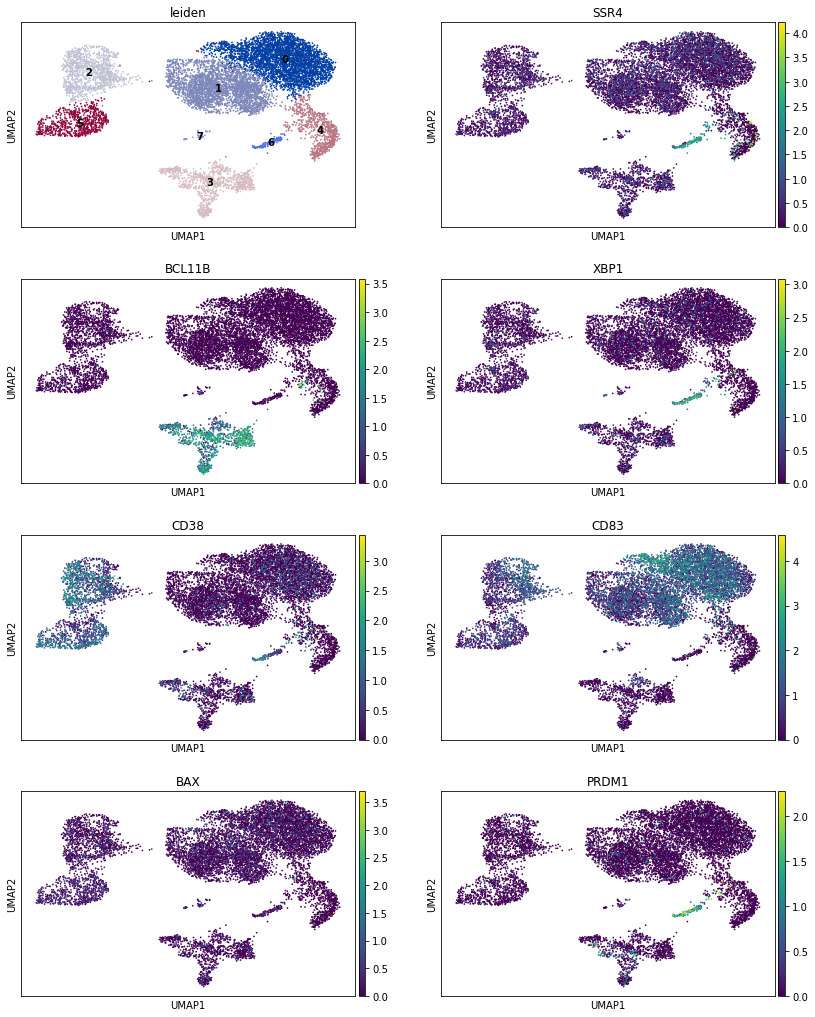

In [26]:
#sc.tl.dendrogram(adata, 'leiden')
sc.pl.umap(badatasave,
           color=["leiden", 
                  "SSR4" # marker for one group, may be involved in antibody secretion
                  , "BCL11B",
                  "XBP1", # plasma cell differentiation -> it is possibly plasma cells? yes
                 # FNDC38 is repressed in tumor metastasis
                 "CD38", "CD83",
                  "BAX", "PRDM1"
                  # LPP possibly involved in cell motility
                  # FYN promotes cell growth
                  # HMGB2 is involved in dna ligation in VDJ recombination
                 
                 ], ncols=2, legend_loc="on data")

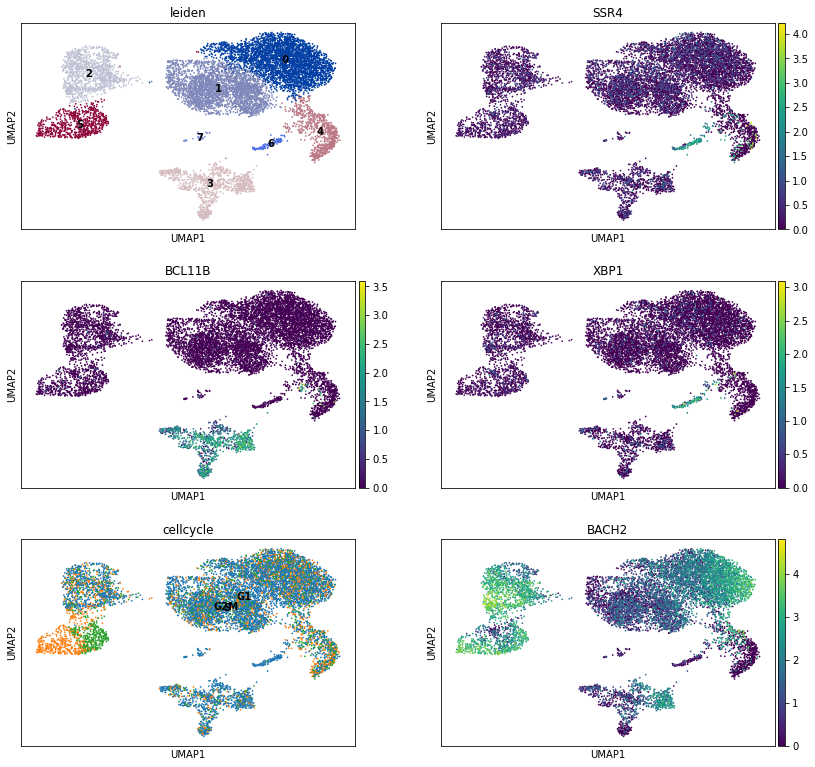

In [8]:
sc.pl.umap(badatasave,
           color=["leiden", 
                  "SSR4" # marker for one group, may be involved in antibody secretion
                  , "BCL11B",
                  "XBP1", # plasma cell differentiation -> possibly plasma cells?
                 # FNDC38 is repressed in tumor metastasis
                 "cellcycle", 
                  "BACH2"
                  # group 5 is more progressing in the cell cycle
                 ], ncols=2, legend_loc="on data")

In [3]:
#adata

# storing b cell data: 

#bcellanalysisfile = '/home/filippe/python/bestbcellanalysis.h5ad'

#open(bcellanalysisfile, 'a').close()

#adata.write(bcellanalysisfile)

# retrieving saved bcell adata from 24th of january: 
import anndata as ad
badatasave = ad.read('bestbcellanalysis.h5ad', backed='r')

In [4]:
badatasave

AnnData object with n_obs × n_vars = 10168 × 7378 backed at 'bestbcellanalysis.h5ad'
    obs: 'batchname', 'cellbc', 'donor', 'prob_doublet', 'trust4_celltype', 'batch', 'cnt_telo', 'cnt_atac', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase', 'cellcycle', 'leiden', 'log_telo', 'log_telo_norm', 'log_total_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'batchname_colors', 'cellcycle_colors', 'dendrogram_leiden', 'donor_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'trust4_celltype_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [23]:
# may need to rerun when loading badatasave!


# create a dictionary to map cluster to annotation label
leiden2annotation = {
     '0': 'LZ1',
     '1': 'LZ2',
     '5': 'DZ1',
     '2': 'DZ2',
     '3': 'T cell',
     '4': 'Other', # might actually be apoptotic cells or low quality cells
     '6': 'Plasma cell',
     '7': 'Dendritic cell',
     # order here does not affect order on plot
}

# add a new `.obs` column called `b_cell_type` by mapping clusters to annotation using pandas `map` function
badatasave.obs['b_cell_type'] = badatasave.obs['leiden'].map(leiden2annotation).astype('category')



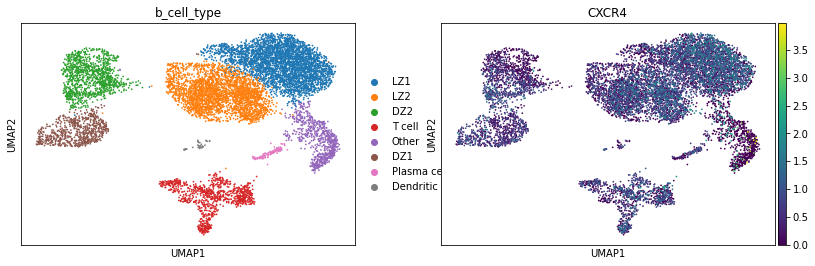

In [24]:
# it worked
sc.pl.umap(badatasave,
           color=['b_cell_type', 'CXCR4'])



In [100]:
adata # adata is similar to numpy arrays

AnnData object with n_obs × n_vars = 10168 × 7378
    obs: 'batchname', 'cellbc', 'donor', 'prob_doublet', 'trust4_celltype', 'batch', 'cnt_telo', 'cnt_atac', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase', 'cellcycle', 'leiden', 'log_telo', 'log_telo_norm', 'log_total_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'cellcycle_colors', 'batchname_colors', 'donor_colors', 'trust4_celltype_colors', 'rank_genes_groups', 'dendrogram_leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [13]:
#from copy import deepcopy

#bdata = deepcopy(badatasave)



No Python documentation found for "Deep copy operation on arbitrary Python objects.\n\n    See the module's __doc__ string for more info.".
Use help() to get the interactive help utility.
Use help(str) for help on the str class.



ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:05)


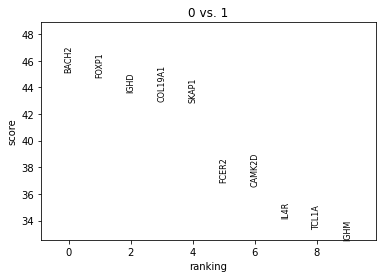

In [6]:
sc.tl.rank_genes_groups(badatasave, 'leiden', groups=['0'], reference='1')
sc.pl.rank_genes_groups(badatasave, groups=['0'], n_genes=10)
# BACH2 FOXP1 IGHD SKAP1 TCL1A

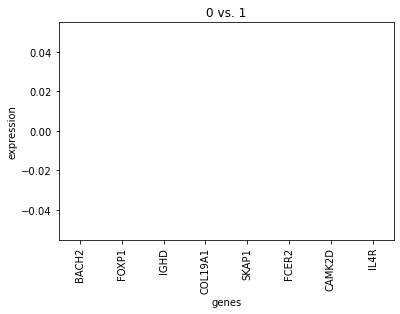

In [7]:
sc.pl.rank_genes_groups_violin(badatasave, groups='0', n_genes=8)